<a href="https://colab.research.google.com/github/nishapagare97/Analytics-Vidya-projects/blob/main/Amazon_Customer_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")                   

import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk   
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##reading dataset
df = pd.read_csv('/content/drive/MyDrive/Reviews.csv')

print(df.shape)
df.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# 2 Data Preparation

In [ ]:
### add some columns for upvote metrics

df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


**assigning different different labels to helpful% according to its value**

In [ ]:
df['Helpful %'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [ ]:
pd.cut(df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

0         80-100%
1             NaN
2         80-100%
3         80-100%
4             NaN
           ...   
568449        NaN
568450        NaN
568451    80-100%
568452    80-100%
568453        NaN
Name: Helpful %, Length: 568454, dtype: category
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [ ]:
df['%upvote'] = pd.cut( df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [ ]:
df.groupby(['Score', '%upvote']).agg('count')

Id  ProductId  UserId  ...  Summary    Text  Helpful %
Score %upvote                             ...                            
1     Empty      8060       8060    8060  ...     8060    8060       8060
      0-20%      2338       2338    2338  ...     2338    2338       2338
      20-40%     4649       4649    4649  ...     4649    4649       4649
      40-60%     6586       6586    6586  ...     6586    6586       6586
      60-80%     5838       5838    5838  ...     5838    5838       5838
      80-100%   12531      12531   12531  ...    12531   12531      12531
2     Empty      4234       4234    4234  ...     4234    4234       4234
      0-20%       762        762     762  ...      737     762        762
      20-40%     1618       1618    1618  ...     1618    1618       1618
      40-60%     3051       3051    3051  ...     3051    3051       3051
      60-80%     2486       2486    2486  ...     2486    2486       2486
      80-100%    7014       7014    7014  ...     7014    7014       7014
3     Empty      5062       5062    5062  ...     5062    5062       5062
      0-20%       474        474     474  ...      474     474        474
      20-40%     1506       1506    1506  ...     1506    1506       1506
      40-60%     3384       3384    3384  ...     3384    3384       3384
      60-80%     2754       2754    2754  ...     2754    2754       2754
      80-100%   11037      11037   11037  ...    11036   11037      11037
4     Empty      4780       4780    4780  ...     4780    4780       4780
      0-20%       116        116     116  ...      116     116        116
      20-40%      909        909     909  ...      909     909        909
      40-60%     3185       3185    3185  ...     3185    3185       3185
      60-80%     2941       2941    2941  ...     2941    2941       2941
      80-100%   26707      26707   26707  ...    26707   26707      26707
5     Empty     11638      11638   11638  ...    11638   11638      11638
      0-20%       432        432     432  ...      432     432        432
      20-40%     2275       2275    2275  ...     2275    2275       2275
      40-60%    10312      10312   10312  ...    10312   10312      10312
      60-80%    11060      11060   11060  ...    11060   11060      11060
      80-100%  140661     140661  140661  ...   140661  140661     140661

[30 rows x 10 columns]

**considering only Id Column, as I have to count Total Upvotes for different different categories**

In [ ]:
df.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [ ]:
df_s=df.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
df_s

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10,max_words=150).generate(' '.join
                                                                                           (df['Text']))

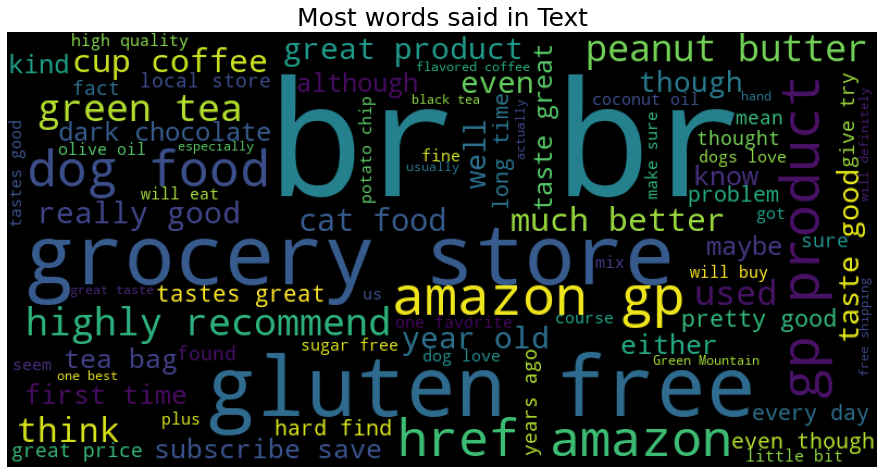

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most words said in Text", fontsize=25)
plt.savefig('SPECIAL.jpeg')
plt.show()

**create Pivot Table for better conclusion**

In [ ]:
df_s.pivot(index='%upvote',columns='Score')

Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

**create heatmap of it,for better Visualisations**

Text(0.5, 1.0, 'How helpful users find among user scores')

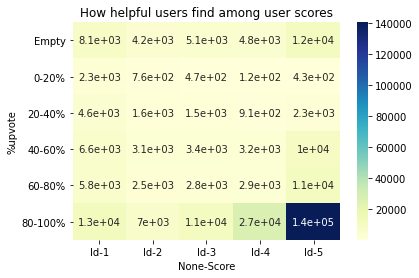

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_s.pivot(index='%upvote',columns='Score'),annot=True,cmap = 'YlGnBu')
plt.title('How helpful users find among user scores')


*   Reviews are skewed towards positive

*   More than half of the reviews are with zero votes
Many people agree with score 5 reviews



In [ ]:
df.shape

(568454, 12)

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [ ]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [ ]:
df2 = df[df['Score'] != 3]
X = df2['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df2['Score'].map(y_dict)

**Distribution of HelpfulnessNumerator**


From the describe, we can see that there is a huge different third quantile value and max value.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

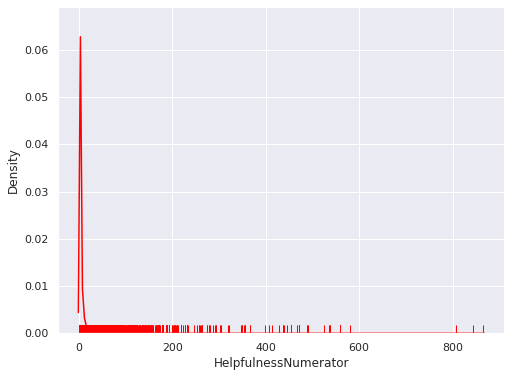

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(df.HelpfulnessNumerator, rug=True, hist=False, color = 'red')

The density plot also show that there are outliers values. We need to keep in mind that 3rd quantile value for this feature is 2. We can see there are is a huge gap between max HelpfulnessNumerator value and the value at 75%. (3rd quantile)

In [ ]:
df.loc[df.HelpfulnessNumerator >= 15].Text.head(5).tolist()

["McCann's Instant Oatmeal is great if you must have your oatmeal but can only scrape together two or three minutes to prepare it. There is no escaping the fact, however, that even the best instant oatmeal is nowhere near as good as even a store brand of oatmeal requiring stovetop preparation.  Still, the McCann's is as good as it gets for instant oatmeal. It's even better than the organic, all-natural brands I have tried.  All the varieties in the McCann's variety pack taste good.  It can be prepared in the microwave or by adding boiling water so it is convenient in the extreme when time is an issue.<br /><br />McCann's use of actual cane sugar instead of high fructose corn syrup helped me decide to buy this product.  Real sugar tastes better and is not as harmful as the other stuff. One thing I do not like, though, is McCann's use of thickeners.  Oats plus water plus heat should make a creamy, tasty oatmeal without the need for guar gum. But this is a convenience product.  Maybe the 

**Distribution of HelpfulnessDenominator**

HelpfulnessDenominator is another feature that has extreme values.

Let's see the distribution of the HelpfulnessDenominator values by using density plot.

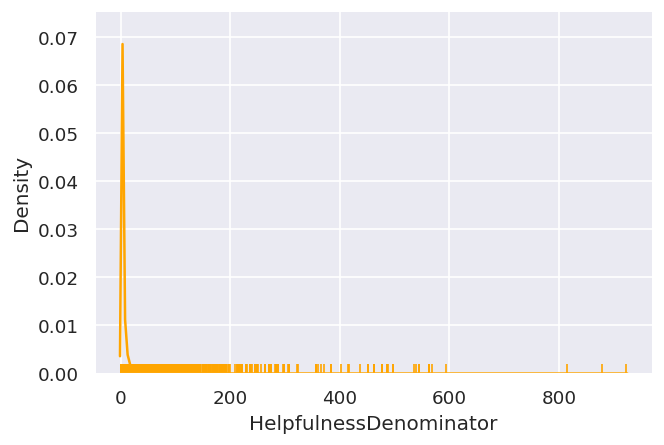

In [ ]:
from matplotlib.pyplot import figure
from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=100)
figure(dpi=120)
sns.distplot(df.HelpfulnessDenominator, rug=True, hist=False, color = 'orange')


By looking at this plot and considering 3rd quantile value, which is 2, we can choose 10 as cut-off point for HelpfulnessDenominator feature.

Let's take a look at values bigger than 400.

In [ ]:
df.loc[df.HelpfulnessDenominator >= 25].Text.head(5).tolist()

['I first discovered Kettle Chips with sea salt and vinegar while shopping at Trader Joe\'s with my daughter Mindy.  I couldn\'t believe how tasty they were; the best chip I had ever eaten.  It was love at first bite, and I\'ve been munching them ever since.<br /><br />Other things in their favor: they\'re thicker than other chips, so don\'t crumble as I\'m devouring them; they\'re delightfully crunchy; and the salt-and-vinegar combination is heavenly.  I tried to create an original line to describe this palate-pleasing taste treat, but couldn\'t beat what the manufacturer said: tongue-puckering tang and crunch.  Isn\'t that poetic?<br /><br />As for health values, since Kettle Chips are not peeled during preparation, I\'m getting more nutrition, such as potassium and vitamin C.  My mother would approve of that, and the fact that they\'re hand-cooked in small batches.<br /><br />I often enjoy Kettle Chips as an afternoon snack with my favorite soda or iced tea, but they\'re also delici

**convert your text into vectors using NLP**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')

In [ ]:
##takes almost 2 mins to execute
X_c = c.fit_transform(X)

In [ ]:
print('features: {}'.format(X_c.shape[1]))

features: 114969


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y)
print(' train records: {}'.format(X_train.shape[0]))

 train records: 394360


In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [ ]:
ml =log.fit(X_train, y_train)
acc = ml.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc))

Model Accuracy: 0.9360156404521733


**fetch Top 20 Positive & Top 20 negative words**

In [ ]:
w = c.get_feature_names()
w

['00',
 '000',
 '0000',
 '000001',
 '00001',
 '000013',
 '0000soo',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000iu',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '000usd',
 '000v',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '0023',
 '003',
 '004',
 '00493',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071486011',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00b',
 '00gr',
 '00lb',
 '00m',
 '00pm',
 '00s',
 '00something',
 '00z',
 '01',
 '010',
 '0100',
 '01014',
 '01069',
 '011',
 '012',
 '013',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '01915',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02

In [ ]:
coef = ml.coef_.tolist()[0]
coef

[-0.3245441551540942,
 -0.011157434782958588,
 0.3475139317760068,
 -0.00724730221793726,
 -0.01073249683882451,
 0.0,
 0.0,
 0.0006331124518406272,
 0.0006331124518406272,
 0.00037915868902270244,
 0.001161039152032828,
 -0.01140481793855218,
 0.001153208866806421,
 0.01252018630895023,
 -0.16150489594235118,
 0.00834865677656875,
 0.0023176894799190897,
 0.0032953228834775037,
 0.0,
 4.943463770538283e-05,
 0.10885719754581388,
 0.01659802122966847,
 0.04182840632853845,
 0.04182840632853845,
 0.04182840632853845,
 0.04182840632853845,
 0.04182840632853845,
 0.04182840632853845,
 0.04182840632853845,
 0.04182840632853845,
 0.04182840632853845,
 -0.00038486990778837033,
 0.056271750427107914,
 0.00013093247964010284,
 0.0,
 -0.0004793720741158013,
 0.00012860829914201875,
 0.003253401755014823,
 0.045386382434241465,
 2.491761660563099e-05,
 -0.11119574768212132,
 0.0,
 6.661945263809345e-05,
 0.007075292018152454,
 -0.07123775895350119,
 0.00011193475885043966,
 0.0,
 3.9699257463315

In [ ]:
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_df

,Word,Coefficient
0,00,-0.324544
1,000,-0.011157
2,0000,0.347514
3,000001,-0.007247
4,00001,-0.010732
...,...,...
114964,çaykur,0.000778
114965,çelem,-0.125430
114966,être,0.018213
114967,île,0.000000


In [ ]:
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'],ascending=False)
coeff_df

,Word,Coefficient
80600,pleasantly,3.829937
39072,downside,3.500591
94667,skeptical,3.177836
5865,addicting,2.920729
55029,hooked,2.715304
...,...,...
106852,unacceptable,-2.981789
37560,disappointing,-3.002430
88351,returnable,-3.151153
34989,deceptive,-3.591252


In [ ]:
print('-Top 20 positive-')
print(coeff_df.head(20).to_string(index=False))
print('\n')
print('-Top 20 negative-')        
print(coeff_df.tail(20).to_string(index=False))

-Top 20 positive-
       Word  Coefficient
 pleasantly     3.829937
   downside     3.500591
  skeptical     3.177836
  addicting     2.920729
     hooked     2.715304
   drawback     2.434877
     delish     2.414205
       calm     2.391313
     resist     2.354287
  delighted     2.332322
    worries     2.223031
      beats     2.211190
   relaxing     2.041319
   thankful     2.026653
        met     2.007626
 economical     1.999578
     intend     1.995463
  excellent     1.991680
   heavenly     1.990880
   hesitant     1.986907


-Top 20 negative-
           Word  Coefficient
        vomited    -2.365169
 disappointment    -2.416655
     unbearable    -2.479920
        allegro    -2.492506
    embarrassed    -2.508676
         lacked    -2.541995
    unappealing    -2.554465
        defeats    -2.610995
     overpowers    -2.663839
         ripoff    -2.755059
       mediocre    -2.761221
      cancelled    -2.909218
    disapointed    -2.911726
          worst    -2.947996
  

**lets try to create a function so that I can apply mutliple NLP Techniques + Multiple Ml algos in such a way that I will acheive my best accuracy**

In [ ]:
### create a function 

def text_fit(X, y, nlp_model,ml_model,coef_show=1):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    acc = ml.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = nlp_model.get_feature_names()
        coef = ml.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('\n')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('\n')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression

In [ ]:
text_fit(X, y, c, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9363883944193406


-Top 20 positive-
       Word  Coefficient
 pleasantly     3.980065
   downside     3.208597
  addicting     2.901253
  skeptical     2.581501
       whim     2.466202
     delish     2.386616
     resist     2.283656
     hooked     2.165124
   drawback     2.082010
   hesitant     2.069140
    worries     2.060704
    easiest     2.043595
   soothing     2.019293
   terrific     2.019195
  excellent     1.974889
   hydrated     1.963453
  delighted     1.946166
    trainer     1.925233
    martini     1.924509
        yay     1.881821


-Top 20 negative-
           Word  Coefficient
            ick    -2.309219
         bummer    -2.311225
     overpowers    -2.328109
          blech    -2.343963
       mediocre    -2.378254
 disappointment    -2.452770
        defeats    -2.488336
         lacked    -2.582179
    embarrassed    -2.582523
     returnable    -2.595344
    disapointed    

**Lets define a predict function**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X, y, nlp_model,ml_model):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    predictions=ml.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
predict(X,y,c,lr)

features: 114969
 train records: 394360
 test records: 131454
[[ 14994   2790]
 [  5682 107988]]
0.9355515997991692


**Accuracy is around 93.9% - not bad. However we notice that some of those significant coefficients are not meaningful, e.g. 280mg**.**

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
### calling function for dummy classifier 
text_fit(X, y, c, DummyClassifier(),0)

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.7372845253853059


**Logistic regression model on TFIDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9356276720373666


-Top 20 positive-
       Word  Coefficient
      great    13.844871
  delicious    12.337366
       best    11.543869
    perfect    10.726348
      loves     9.840736
  excellent     9.686707
     highly     8.554985
       love     8.520003
  wonderful     8.255383
     hooked     7.415643
       good     7.398322
    amazing     7.376783
    awesome     7.252087
       nice     7.247953
   favorite     7.142075
 pleasantly     6.963682
    pleased     6.843537
      yummy     6.782629
     smooth     6.403271
       glad     6.299834


-Top 20 negative-
           Word  Coefficient
          waste    -5.762615
   unacceptable    -5.775331
          worse    -5.990969
    undrinkable    -6.092106
           yuck    -6.117352
     disgusting    -6.161573
          stale    -6.250848
      tasteless    -6.312174
          bland    -6.377575
           weak    -6.628150
          threw    

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
predict(X, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
[[ 14327   2280]
 [  6282 108565]]
0.9348669496553927


**Accurany is roughly the same - 93.5%. However we notice that the significant words make much more sense now, with higher coefficient magnitude as well!**

# Upvote prediction

**We will be focusing on score 5 reviews, and get rid of comments with neutral votes**

In [ ]:
data = df[df['Score'] == 5]

In [ ]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful %', '%upvote'],
      dtype='object')

In [ ]:
data2 = data[data['%upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data2.shape

(154428, 12)

In [ ]:
X = data2['Text']

In [ ]:
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data2['%upvote'].map(y_dict)

In [ ]:
print(y.value_counts())

1.0    151721
0.0      2707
Name: %upvote, dtype: int64


**The target class 'y' is highly skewed , we will observe positive upvotes are too much higher than negative ones**

Let's resample the data to get balanced data:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf=TfidfVectorizer()

In [ ]:
X_c=tf.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_c,y,train_size=0.7)

In [ ]:
y_test.value_counts()

In [ ]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

In [ ]:
os =  RandomOverSampler()

In [ ]:
X_train_res, y_train_res = os.fit_sample(X_c, y)

In [ ]:
X_train_res.shape,y_train_res.shape

In [ ]:
from collections import Counter

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_class=LogisticRegression()

In [ ]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [ ]:
clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_res,y_train_res)

In [ ]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

**End**